# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [5]:
%matplotlib inline 

In [2]:
%gui qt

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 

# Visa interface for the M8190A instrument:

In [2]:
M8190A = VisaR(AWG_Settings2,60000)

In [3]:
Initialization(M8190A,AWG_Settings2)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output Voltage set to 3.00000000000000E-01deciVolts


In [5]:
M8190A.query('*IDN?')

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2'

In [14]:
M8190A.write('*RST')

5

In [5]:
M8190A.query('FREQ:RAST?')

'5.00000000000000E+08'

In [ ]:
M8190A.query('SYST:ERR?')

In [6]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [9]:
DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader(PScheme,PScheme2,5,15,7500000,2,4,M8190A,AWG_Settings2,1,15)

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
57.86038064956665


In [6]:
M8190A.write('ABOR')

5

In [70]:
start=time.time()

pol, timm =SweepFastPulseList(Pulses_List,10,10,30,10000000)

end = time.time()

comptime =end - start

In [72]:
pol1, timm =SweepFastPulseList(Pulses_List,10,5,30,10000000)
pol2, timm =SweepFastPulseList(Pulses_List,10,0,30,10000000)

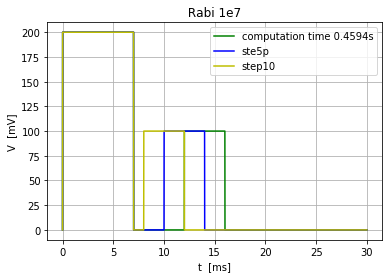

In [74]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timm,pol,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptime))
ax.plot(timm,pol1,'-b',label= 'ste5p')
ax.plot(timm,pol2,'-y',label= 'step10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [62]:
L=np.array([sweepslice(Pulse,10,2,15,10000000) for Pulse in Pulses_List])
M=np.sum(L,0)

In [58]:
L

array([[  0., 200., 200., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [61]:
np.sum(L,0)

array([  0., 200., 200., ...,   0.,   0.,   0.])

In [3]:
%matplotlib notebook
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 32), ylim=(0, 11))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  We iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,32,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P

<IPython.core.display.Javascript object>

In [57]:
pulsescheme = np.add(L[0],L[1])

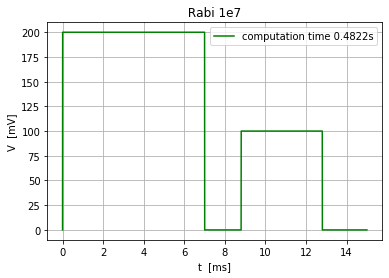

In [63]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timm,M,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptime))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

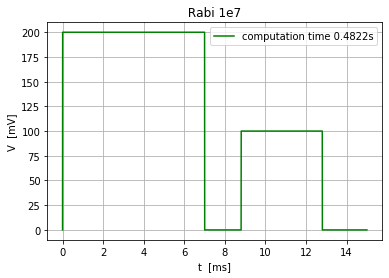

In [54]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timm,pulsescheme,'-g',label= 'computation time {tim:.4f}s'.format(tim = comptime))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Rabi 1e7 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [13]:
points=36000000

In [53]:
pulsescheme

array([  0., 200., 200., ...,   0.,   0.,   0.])

In [14]:
start = time.time()

pulse, timee = Sweep(Pulses_List,10,2,15,points)
pulse2, timee = Sweep(Pulses_List2,10,2,15,points)

end = time.time()

comptim= end -start

In [15]:
comptim

3.9881739616394043

In [16]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timee,pulse,'-g',label= 'computation time {tim:.4f}s, , SegmentA'.format(tim = comptim))
ax.plot(timee,pulse2,'-g',label= 'computation time {tim:.4f}s , SegmentB'.format(tim = comptim))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Pulse List 36000000 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

MemoryError: Unable to allocate 137. MiB for an array with shape (72000000, 2) and data type bool

In [3]:
start = time.time()

pulse, timee = Sweep(Pulses_List,10,0,15,36000000)
pulse2, timee = Sweep(Pulses_List2,10,0,15,36000000)

end = time.time()

comptim= end -start

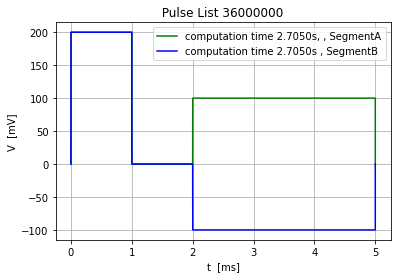

In [5]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timee,pulse,'-g',label= 'computation time {tim:.4f}s, , SegmentA'.format(tim = comptim))
ax.plot(timee,pulse2,'-b',label= 'computation time {tim:.4f}s , SegmentB'.format(tim = comptim))
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Pulse List 36000000 ')

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [4]:
comptim

2.633706569671631

In [7]:
start = time.time()

CSV_PD(pulse,AWG_Settings2,1,0)

end = time.time()

print(end -start)

70.1556441783905


In [8]:
start = time.time()

CSV_PD(pulse2,AWG_Settings2,0,0)

end = time.time()

print(end -start)

69.00790858268738


# Implementing numpy savetxt instead of Panda

In [9]:
pulse

array([  0., 200., 200., ..., 100., 100.,   0.])

In [11]:
ar=['a','b','c','d']

In [12]:
ar

['a', 'b', 'c', 'd']

In [16]:
dtype = [('Y1', (np.float)), ('SyncMarker1', np.int32), ('SampleMarker1', np.int32)]

In [20]:
start = time.time()

dtype = [('Y1', (np.float)), ('SyncMarker1', np.int32), ('SampleMarker1', np.int32)]
SegmentA= np.array([(i/, 1, 1) for i in pulse], dtype=dtype)
np.savetxt('struct_array.csv', structuredArr, delimiter=',', fmt=['%f' , '%d', '%d'], header='Y1,SyncMarker1,SampleMarker1', comments='')

end = time.time()

print(end -start)

10.960485696792603


In [21]:
SegmentA

array([(  0., 1, 1), (200., 1, 1), (200., 1, 1), ..., (100., 1, 1),
       (100., 1, 1), (  0., 1, 1)],
      dtype=[('Y1', '<f8'), ('SyncMarker1', '<i4'), ('SampleMarker1', '<i4')])

In [25]:
pulse/300

array([0.        , 0.66666667, 0.66666667, ..., 0.33333333, 0.33333333,
       0.        ])

In [23]:
start = time.time()

np.savetxt(r'{File_Location}\Segment{seg}_{n}_{nm}.csv'.format(File_Location = AWG_Settings2['Data Directory'],seg='A',n=len(pulse),nm=0), SegmentA, delimiter=',', fmt=['%f' , '%d', '%d'], header='Y1,SyncMarker1,SampleMarker1', comments='')


end = time.time()

print(end -start)

In [ ]:
 r'{File_Location}\Segment{seg}_{n}_{nm}.csv'.format(File_Location = AWG['Data Directory'],seg=segment,n=len(pulse_array),nm=step)

In [26]:
def Pulse_csv(pulse,AWG,marker,step):
    
    """ This function imports the pulse array into a csv file that is suitable to load as a segment to the AWG.

        This function imports the pulse array using numpys savetxt. It also appends the Marker values given the
        marker parameter (either 1 or 0, this define whether this segment is A or B within the sequence)
        The values of in the csv file are normalized to the amplitued value given in the AWG dictionary.
        Step refers to the sweeping step.
    """
    #we define the dtype for the csv file formating
    dtype = [('Y1', (np.float)), ('SyncMarker1', np.int32), ('SampleMarker1', np.int32)]

    #simposing the marker condition for the segment naming
    pulse_segment= np.array([(i/AWG['Voltage Amplitude'], marker, marker) for i in pulse], dtype=dtype)

    #Segment naming depending on the marker:

    if marker == 0:
        segment = 'B'
    
    if marker == 1 :
        segment = 'A'

    np.savetxt(r'{File_Location}\Segment{seg}_{n}_{nm}.csv'.format(File_Location = AWG['Data Directory'],seg=segment,n=len(pulse),nm=step),pulse_segment,    delimiter=',', fmt=['%f' , '%d', '%d'], header='Y1,SyncMarker1,SampleMarker1', comments='')


In [27]:
start = time.time()

pulse, timee = Sweep(Pulses_List,10,0,15,7500000)
pulse2, timee = Sweep(Pulses_List2,10,0,15,7500000)

end = time.time()

comptim= end -start

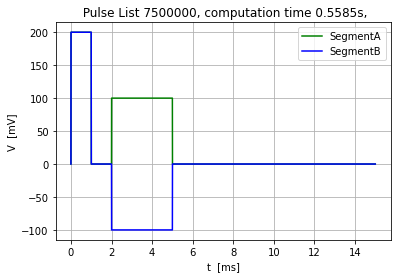

In [29]:
fig,ax= plt.subplots()

ax.grid(True)


ax.plot(timee,pulse,'-g',label= 'SegmentA')
ax.plot(timee,pulse2,'-b',label= 'SegmentB')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

ax.set_title(' Pulse List 7500000, computation time {tim:.4f}s,'.format(tim = comptim))

ax.legend(loc=0)
plt.show()
#fig.savefig('PulseSequence_5ms_125Mhz_step2',optimize=True,bbox_inches='tight')

In [30]:
start = time.time()

Pulse_csv(pulse,AWG_Settings2,1,0)


end = time.time()

print(end -start)

27.985697269439697


In [34]:
start = time.time()

CSV_PD(pulse,AWG_Settings2,1,0)

end = time.time()

print(end -start)

11.42148733139038


In [31]:
start = time.time()

Pulse_csv(pulse2,AWG_Settings2,0,0)


end = time.time()

print(end -start)

27.544313192367554


In [35]:
start = time.time()

CSV_PD(pulse2,AWG_Settings2,0,0)

end = time.time()

print(end -start)

11.329909801483154


## Panda faster?

# Sequencing

In [6]:
start = time.time()

pulse, timee = Sweep(Pulses_List,10,0,15,7500000)
pulse2, timee = Sweep(Pulses_List2,10,0,15,7500000)

end = time.time()

comptim= end -start

In [7]:
start = time.time()

Sequence_Array(M8190A,pulse,pulse2,AWG_Settings2,0,1)

end = time.time()

print(end -start)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,7500000,2,7500000  [(segment id, Segment size)]
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


(0,
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 7499995  0.000000            1              1
 7499996  0.000000            1              1
 7499997  0.000000            1              1
 7499998  0.000000            1              1
 7499999  0.000000            1              1
 
 [7500000 rows x 3 columns],
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            0              0
 1        0.666667            0              0
 2        0.666667            0              0
 3        0.666667            0              0
 4        0.666667            0              0
 ...           ...          ...            ...
 7499995  0.000000            0              0
 7499996  0.000000       

In [8]:
M8190A.write('INIT:IMM')

9

In [9]:
M8190A.write('ABOR')

5

In [4]:
tic = time.time()

DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader(PScheme,PScheme2,5,15,7500000,2,4,M8190A,AWG_Settings2,1,6)

toc = time.time()

dur = toc -tic

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


In [5]:
dur

95.86239290237427

In [ ]:
M8190A.write('ABOR')

In [ ]:
Swep_Iteration_csv(PScheme,5,15,7500000,2,4,AWG_Settings2,1)

In [16]:
tic = time.time()

obo,b = Sweep_Iteration(PScheme,5,15,7500000,2,4)

toc = time.time()

dur = toc -tic

In [17]:
dur

0.9265170097351074

In [19]:
obo

array([[  0., 200., 200., ...,   0.,   0.,   0.],
       [  0., 200., 200., ...,   0.,   0.,   0.],
       [  0., 200., 200., ...,   0.,   0.,   0.]])

In [21]:
tic = time.time()

Sweep_Iteration_CSV0(obo,AWG_Settings2,1,2)
 
toc = time.time()

dur = toc -tic

In [22]:
dur

32.982321977615356

# Measuring Scheme performance separated

In [5]:
tic = time.time()

pl,b = Sweep_Iteration(PScheme,5,15,7500000,2,4)
pln,b = Sweep_Iteration(PScheme2,5,15,7500000,2,4)

toc = time.time()

print(toc -tic)

0.9132957458496094


In [6]:
tic = time.time()

pln,b = Sweep_Iteration(PScheme2,5,15,7500000,2,4)

toc = time.time()

print(toc -tic)

0.9065802097320557


In [8]:
pln

array([[   0., -200., -200., ...,    0.,    0.,    0.],
       [   0., -200., -200., ...,    0.,    0.,    0.],
       [   0., -200., -200., ...,    0.,    0.,    0.]])

In [10]:
tic = time.time()

location_pl, data_frame_pl = Sweep_Iteration_CSV_Arrays(pl,AWG_Settings2,1,2)
location_pln, data_frame_pln= Sweep_Iteration_CSV_Arrays(pln,AWG_Settings2,0,2)

toc = time.time()

dur = toc -tic

In [11]:
dur

66.27995729446411

In [ ]:
location_pl

In [13]:
tic = time.time()

Sequence_Loader_File(M8190A,location_pl,location_pln,1,6)

toc = time.time()

print(toc -tic)

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
28.642930507659912


# List form

In [2]:
tic = time.time()

locA,dfA,tim = Sweep_Iteration_CSV_List(PScheme,5,15,7500000,2,4,AWG_Settings2,1)
locB,dfB,tim = Sweep_Iteration_CSV_List(PScheme2,5,15,7500000,2,4,AWG_Settings2,0)

toc = time.time()

print(toc -tic)

67.86559891700745


In [5]:
locA

{'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_4.csv'}

In [5]:
tic = time.time()

Sequence_Loader_File(M8190A,locA,locB,1,6)

toc = time.time()

print(toc -tic)

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
28.541661024093628


In [7]:
locA

{'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_4.csv'}

In [6]:
print(locA)

{'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_2.csv', 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_3.csv', 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_4.csv'}


In [ ]:

location_dictionary={
'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_2.csv', 
'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_3.csv',
'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_4.csv'}

In [17]:
dictt=open("Segments A dictionary.txt","+w")
dictt.write("{di}".format(di = locA))
dictt.close()

In [19]:
dictt.close()

In [21]:
import pickle

In [22]:
filename = "pictdict"

In [23]:
#name of the file
outfile=open(filename,'wb')

In [32]:
#putting the dictionary into the file
pickle.dump( locA, open( "save.p", "wb" ) )

In [30]:
infile = open("pictdict",'rb')

In [33]:
lazarus  = pickle.load( open( "save.p", "rb" ) )

In [35]:
print(lazarus)
type(lazarus)

{'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_2.csv', 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_3.csv', 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_7500000_4.csv'}


dict

In [40]:
N=100
t=15

100/15

6.666666666666667

Faster

In [ ]:
DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader(PScheme,PScheme2,5,15,7500000,2,4,M8190A,AWG_Settings2,1,6)

In [ ]:
M8190A.write('ABOR')

In [3]:
from celluloid import Camera
import matplotlib.pylab as pl
from IPython.display import Video

In [ ]:
plt.style.use('seaborn-pastel')
fig = plt.figure()
camera = Camera(fig)
ax = plt.axes(xlim=(-1, 32), ylim=(0, 11))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
# animation function.  We iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,32,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P

In [4]:
import pyqtgraph.examples
pyqtgraph.examples.run()

In [3]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
pg.plot(x, y, pen=None, symbol='o')  ## setting pen=None disables line drawing

In [2]:
%gui qt

In [6]:
x = np.arange(1000)
y = np.random.normal(size=(3, 1000))
plotWidget = pg.plot(title="Three plot curves")
for i in range(3):
    plotWidget.plot(x, y[i], pen=(i,3))

In [8]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
pg.plot(x, y, pen=None, symbol='o')  ## setting pen=None disables line drawing

In [7]:
from pyqtgraph.Qt import QtGui, QtCore

#QtGui.QApplication.setGraphicsSystem('raster')
app = QtGui.QApplication([])
#mw = QtGui.QMainWindow()
#mw.resize(800,800)

win = pg.GraphicsLayoutWidget(show=True, title="Basic plotting examples")
win.resize(1000,600)
win.setWindowTitle('pyqtgraph example: Plotting')

# Enable antialiasing for prettier plots
pg.setConfigOptions(antialias=True)


p6 = win.addPlot(title="Updating plot")
curve = p6.plot(pen='y')
data = np.random.normal(size=(10,1000))
ptr = 0
def update():
    global curve, data, ptr, p6
    curve.setData(data[ptr%10])
    if ptr == 0:
        p6.enableAutoRange('xy', False)  ## stop auto-scaling after the first data set is plotted
    ptr += 1
timer = QtCore.QTimer()
timer.timeout.connect(update)
timer.start(50)

<ipython-input-7-7c249678b104>:8: RuntimeWarning: Visible window deleted. To prevent this, store a reference to the window object.
  win = pg.GraphicsLayoutWidget(show=True, title="Basic plotting examples")


In [5]:
2+2

4